In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import json
!pip install pillow

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
def get_results():
  wine = load_wine()
  fig, ax = plt.subplots(7, figsize = (40, 100))
  test_sizes = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  test_size = 0.4
  tree = DecisionTreeClassifier(criterion='gini')
  i = 0
  while(test_size >= 0.1):
    X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = test_size, random_state=0)
    tree.fit(X_train, y_train)
    plot_tree(tree,  feature_names=wine.feature_names, class_names=['class_0', 'class_1', 'class_2'], filled=True, impurity=False, ax=ax[i])
    y_pred = tree.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='micro'))
    recall.append(recall_score(y_test, y_pred, average='micro'))
    f1.append(f1_score(y_test, y_pred, average='micro'))
    test_sizes.append(test_size)
    test_size -= 0.05
    i+=1
  plt.savefig("tree.jpg")
  plt.show()
  return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1":f1, "test_sizes": test_sizes}

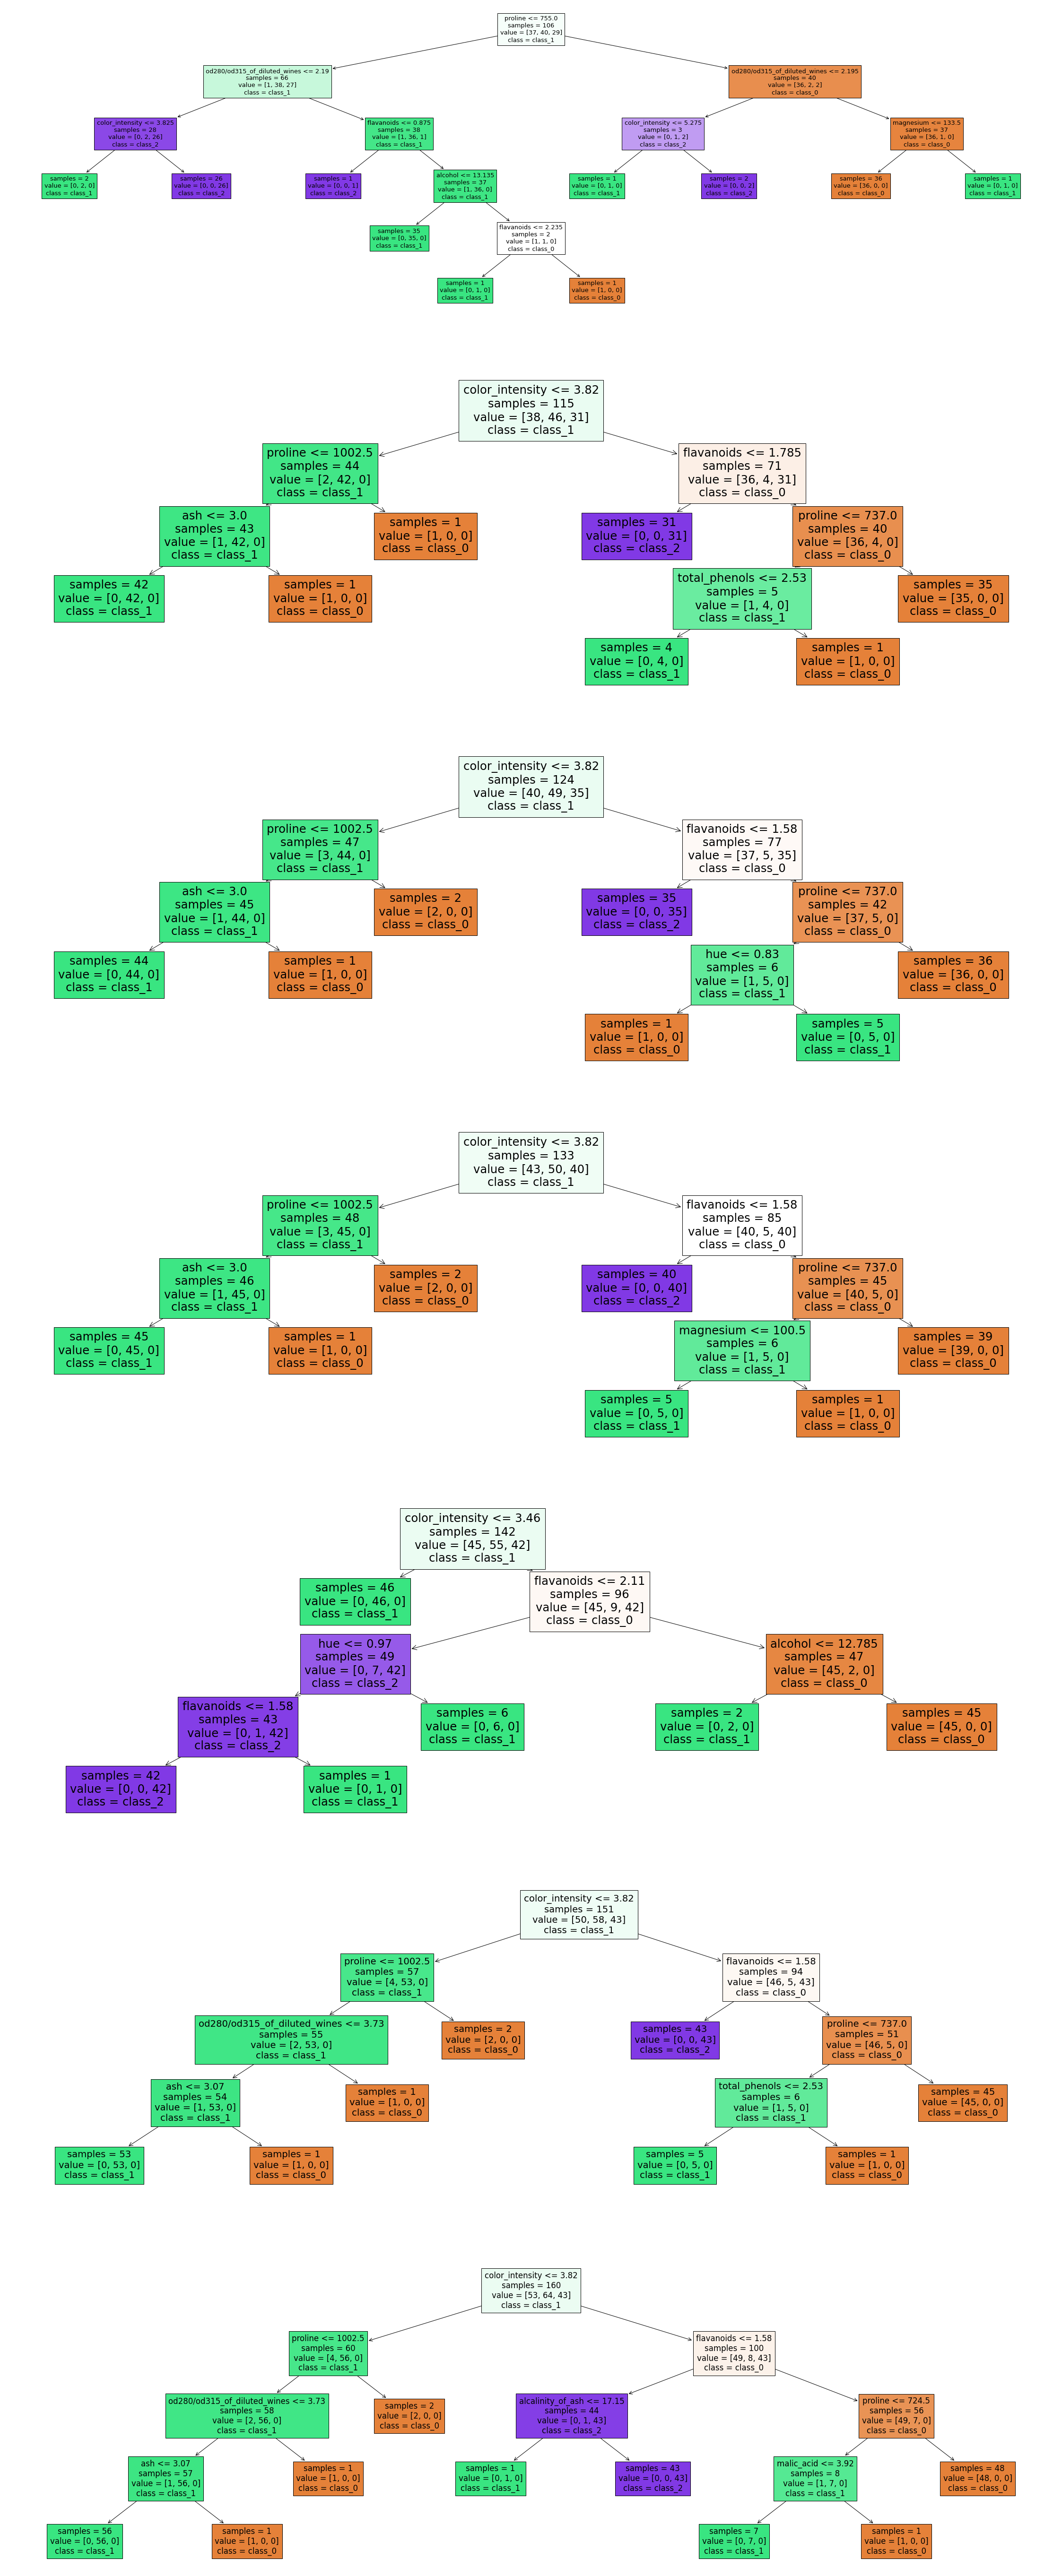

In [ ]:
results = get_results()

In [ ]:
with open('metrics.json', 'r') as f:
    data = json.load(f)

data["decision_tree"] = results  

with open('metrics.json', 'w') as f:
  json.dump(data, f) 

In [ ]:
def draw_results(results):
  accuracy = results['accuracy']
  precision = results['precision']
  recall = results['recall']
  f1 = results['f1']
  test_sizes = results['test_sizes']

  fig, ax = plt.subplots(2, 2, figsize = (15, 13))

  ax[0, 0].plot(test_sizes, accuracy)
  ax[0, 0].set_title('Accuracy scores')
  ax[0, 0].set(xlabel = 'Размер тестовой выборки')

  ax[0, 1].plot(test_sizes, precision)
  ax[0, 1].set_title('Precision scores')
  ax[0, 1].set(xlabel = 'Размер тестовой выборки')

  ax[1, 0].plot(test_sizes, recall)
  ax[1, 0].set_title('Recall scores')
  ax[1, 0].set(xlabel = 'Размер тестовой выборки')

  ax[1, 1].plot(test_sizes, f1)
  ax[1, 1].set_title('F1 scores')
  ax[1, 1].set(xlabel = 'Размер тестовой выборки')
  plt.show()

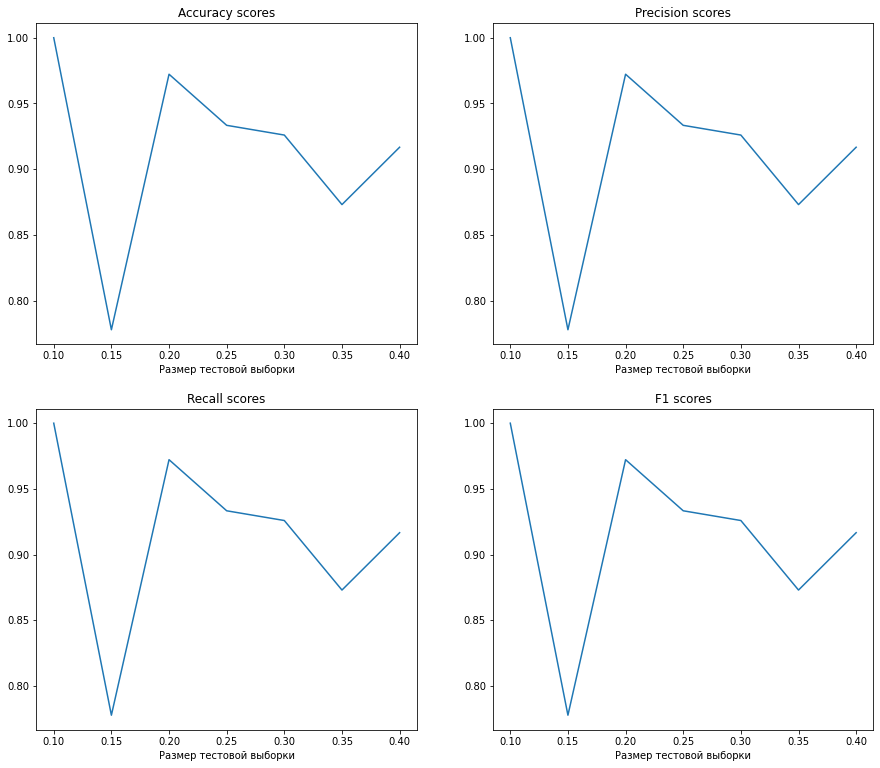

In [ ]:
draw_results(results)